In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [296]:
data = pd.read_csv('cirrhosis.csv')
data.dropna(inplace=True)
data.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [297]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,18189.326087,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,3.039855
std,91.662926,1112.380295,3843.555619,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,0.853999
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,1.000000
25%,79.750000,1185.750000,15162.500000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,2.000000
50%,157.500000,1788.000000,18156.500000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,3.000000
75%,240.250000,2689.750000,20667.500000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,4.000000
max,312.000000,4556.000000,28650.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [298]:
normal_ranges = {
    'Bilirubin': (0.1, 1.2),
    'Cholesterol': (0, 200),
    'Albumin': (3.4, 5.4),
    'Copper': (10, 30),
    'Alk_Phos': (40, 129),
    'SGOT': (8, 45),
    'Tryglicerides': (48.68, 168.15),
    'Platelets': (150, 400),
    'Prothrombin': (11, 13.5)
}

for column in data.columns:
    try:
        data[(data[column] <= normal_ranges[column][0]) & (data[column]>= normal_ranges[column][1])] = np.nan
    except:
        continue

In [299]:
data['Age'] = (data['Age']/365).astype(int)
data['N_Years'] = (data['N_Days']/365).astype(int)
column_names = set(data.columns)
integer_columns = ['Age', 'N_Years','Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Stage' ]
float_columns = list(column_names.difference(set(integer_columns)).difference(set(categorical_columns)))

In [300]:
for column in integer_columns:
    data[column] = data[column].astype(int)

for column in float_columns:
    data[column] = data[column].astype(float)

for column in categorical_columns:
    data[column] = data[column].astype('category')

data.drop(columns=['ID', 'N_Days'], inplace=True)

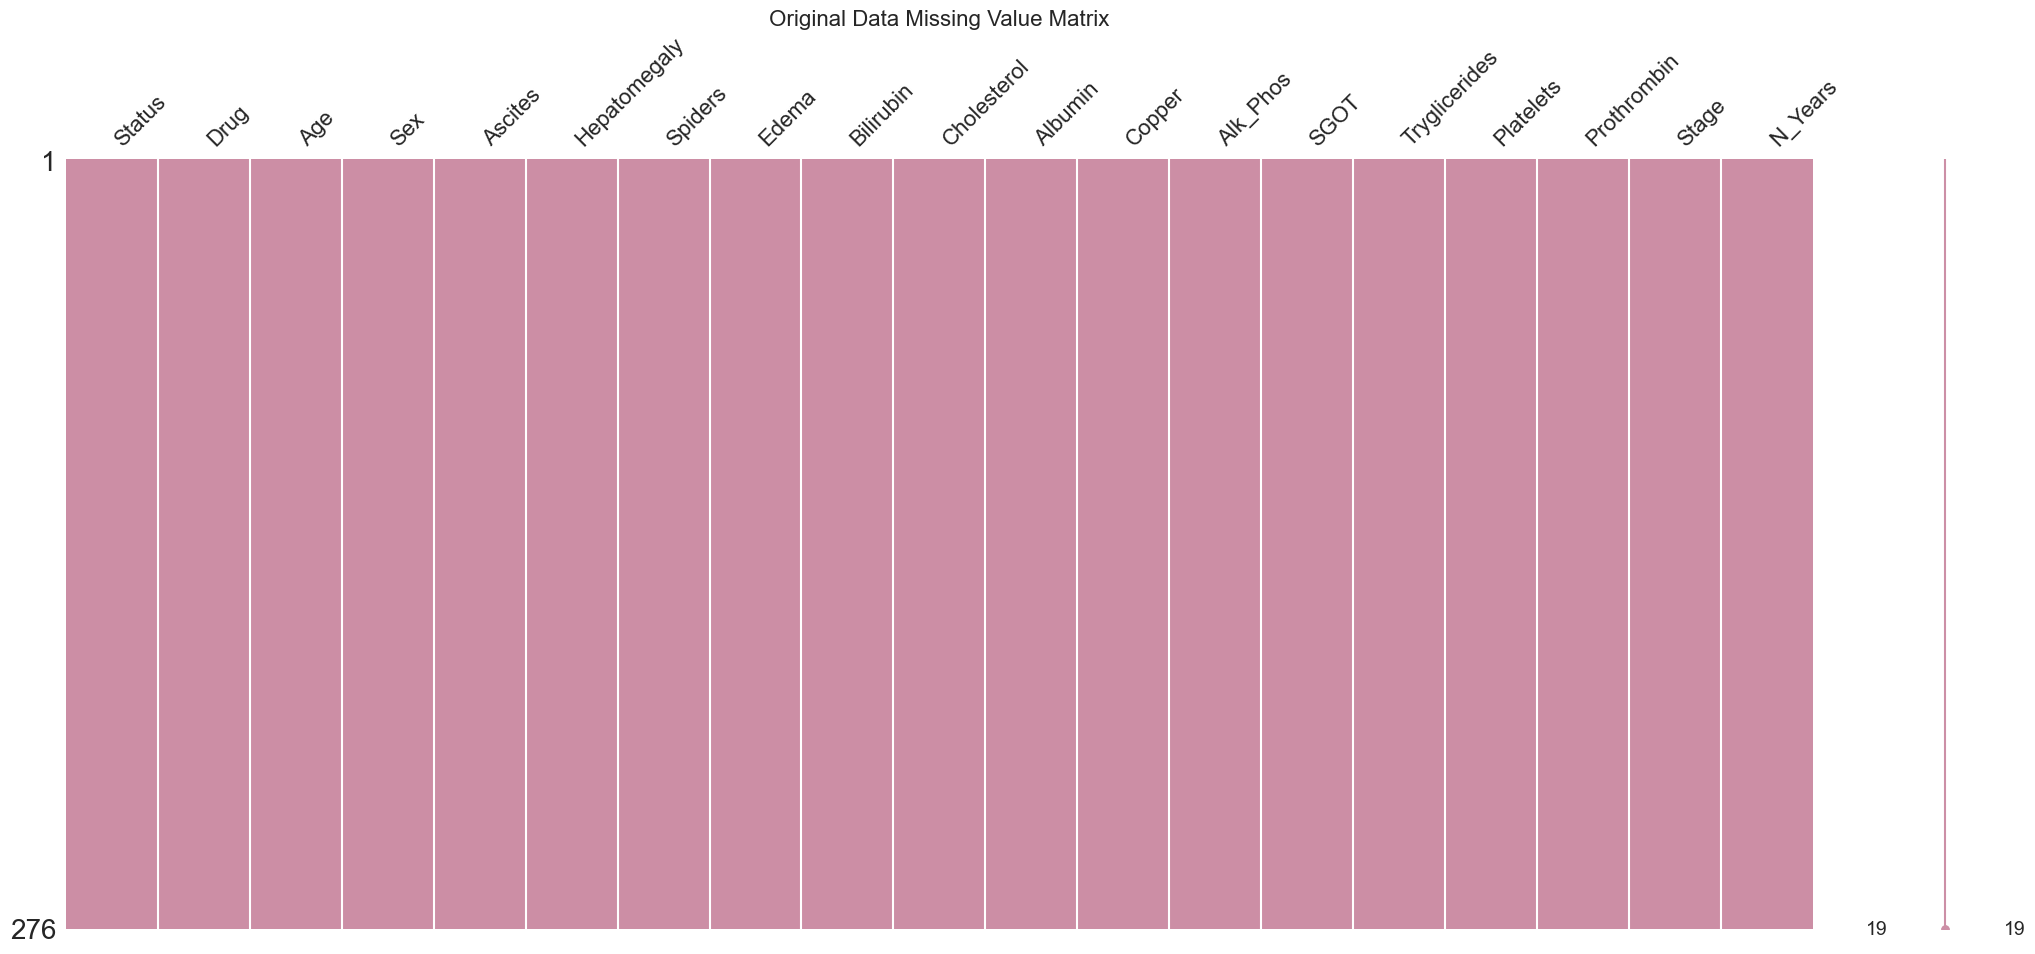

In [301]:
msno.matrix(data, color=  (0.8, 0.56, 0.65))
plt.title("Original Data Missing Value Matrix", fontsize=16)
plt.show()

In [302]:
data.isnull().sum()

Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N_Years          0
dtype: int64

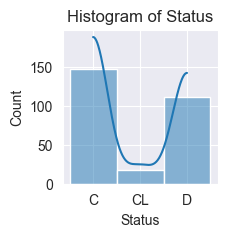

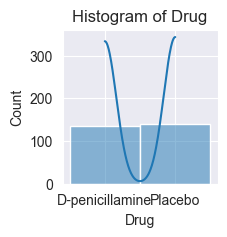

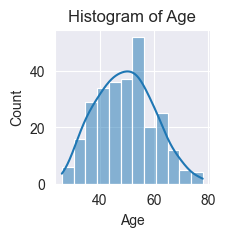

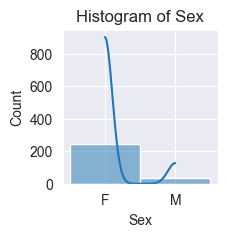

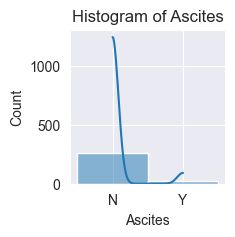

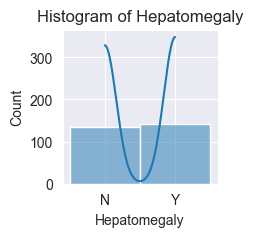

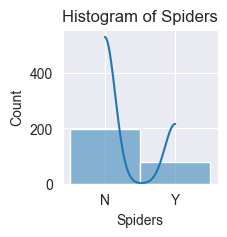

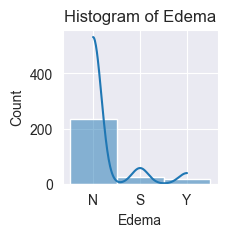

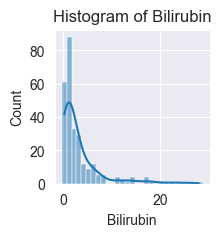

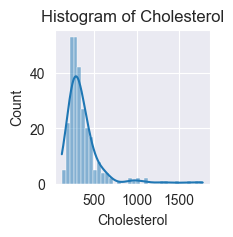

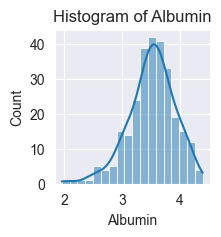

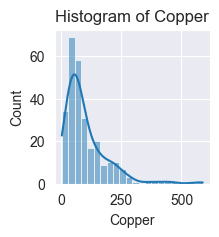

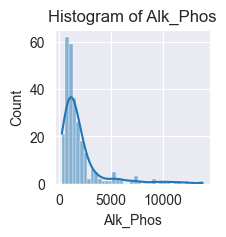

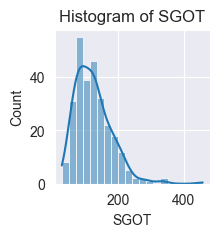

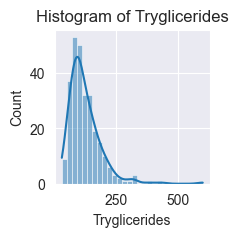

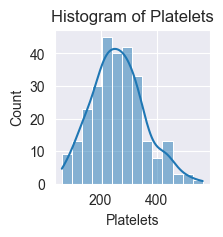

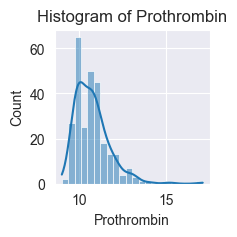

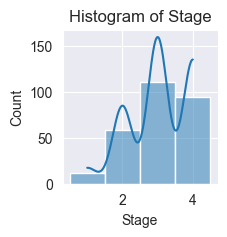

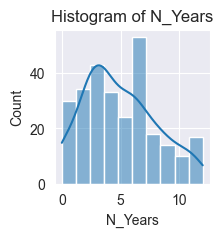

In [303]:
for column in data.columns:
    plt.figure(figsize=(2, 2))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [304]:
with pd.ExcelWriter('analysis.xlsx', engine='xlsxwriter') as writer:
    for column in data.columns: pd.DataFrame(data[column].value_counts()).to_excel(writer, sheet_name=column)

In [305]:
data.describe()

,Age,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,N_Years
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,49.322464,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,4.931159
std,10.523791,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,3.068723
min,26.000000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,0.000000
25%,41.000000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,3.000000
50%,49.000000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,4.000000
75%,56.000000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,7.000000
max,78.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,12.000000


In [306]:
num_col = integer_columns+float_columns
num_col.remove('ID')
num_col.remove('N_Days')

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Status         276 non-null    category
 1   Drug           276 non-null    category
 2   Age            276 non-null    int64   
 3   Sex            276 non-null    category
 4   Ascites        276 non-null    category
 5   Hepatomegaly   276 non-null    category
 6   Spiders        276 non-null    category
 7   Edema          276 non-null    category
 8   Bilirubin      276 non-null    category
 9   Cholesterol    276 non-null    int64   
 10  Albumin        276 non-null    float64 
 11  Copper         276 non-null    int64   
 12  Alk_Phos       276 non-null    float64 
 13  SGOT           276 non-null    float64 
 14  Tryglicerides  276 non-null    int64   
 15  Platelets      276 non-null    int64   
 16  Prothrombin    276 non-null    float64 
 17  Stage          276 non-null    category


In [308]:
import scipy.stats as stats
df = data.copy()
important_cat_columns=[]
for column in num_col:
    df[column] = pd.qcut(df[column], q=4)  # Bin into quartiles, adjust 'q' as necessary
    contingency_table = pd.crosstab(df[column], df['Status'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    if p<0.05:
        print(f"There is relation between {column} and Status: P-value: {p.round(4)}")
        important_cat_columns.append(column)
del df

There is relation between Age and Status: P-value: 0.0
There is relation between N_Years and Status: P-value: 0.0
There is relation between Cholesterol and Status: P-value: 0.0019
There is relation between Copper and Status: P-value: 0.0
There is relation between Tryglicerides and Status: P-value: 0.0342
There is relation between Platelets and Status: P-value: 0.0033
There is relation between SGOT and Status: P-value: 0.0001
There is relation between Albumin and Status: P-value: 0.0
There is relation between Alk_Phos and Status: P-value: 0.0001
There is relation between Prothrombin and Status: P-value: 0.0


TypeError: 'str' object cannot be interpreted as an integer

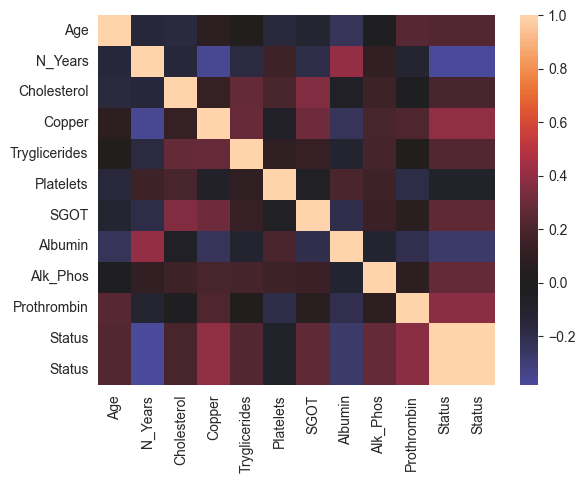

In [315]:
df = data.copy()
df['Status'] = df['Status'].map({'C': 0, 'CL': 1, 'D': 2})
num_col.append('Status')
sns.heatmap(df[num_col].corr(), center=0)
num_col.pop('Status')

In [316]:
from sklearn.model_selection import train_test_split
X, y = data.drop(columns=['Status']), data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)